In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as sm

In [2]:
df= pd.read_csv(r'/content/curencies.csv')
df.head()

,rownames,date,symbol,name,weeklyexcessreturns,dailyexcessreturns,beta,ivol,mom_7,mom_14,...,volume_ma30,n.tx,n.tx_ma30,n.act,n.act_ma30,n.zero,n.zero_ma30,n.new,n.new_ma30,p.new.ratio_ma30
0,91,2018-04-01,BTC,Bitcoin,-0.168461,-0.023607,0.736731,0.017617,-0.168461,-0.160583,...,0.083197,0.000001,0.000002,0.000004,0.000006,0.000002,0.000003,0.000002,0.000002,-1.475254
1,92,2018-04-02,BTC,Bitcoin,0.010239,0.029938,0.745363,0.017232,0.010239,-0.168781,...,0.080934,0.000001,0.000001,0.000004,0.000005,0.000002,0.000003,0.000002,0.000002,-1.481088
2,93,2018-04-03,BTC,Bitcoin,0.054910,0.047493,0.732543,0.016872,0.054910,-0.137729,...,0.077548,0.000002,0.000001,0.000005,0.000005,0.000003,0.000003,0.000002,0.000002,-1.490283
3,94,2018-04-04,BTC,Bitcoin,-0.044284,-0.085841,0.757583,0.016928,-0.044284,-0.104325,...,0.084244,0.000002,0.000002,0.000005,0.000005,0.000003,0.000003,0.000002,0.000002,-1.496291
4,95,2018-04-05,BTC,Bitcoin,-0.307382,-0.011247,0.758523,0.016992,-0.307382,-0.179335,...,0.083808,0.000002,0.000002,0.000005,0.000005,0.000002,0.000003,0.000002,0.000002,-1.501283


In [3]:
df.drop(['rownames', 'name'], axis=1, inplace = True)

In [4]:
df.symbol.unique()

array(['BTC', 'VEE', 'PPT', 'FUN', 'WABI', 'DOGE', 'BNT', 'ANT', 'BRD',
       'GTO', 'RLC', 'PAY', 'DGD', 'STORJ', 'REQ', 'BAT', 'CND', 'OMG',
       'QSP', 'VIBE', 'ZEC', 'DCN', 'DASH', 'SNT', 'LRC', 'ELF', 'ETH',
       'TKN'], dtype=object)

In [5]:
d_BTC = df[df['symbol']=='BTC']
d_BTC.head()

,date,symbol,weeklyexcessreturns,dailyexcessreturns,beta,ivol,mom_7,mom_14,mom_21,mom_28,...,volume_ma30,n.tx,n.tx_ma30,n.act,n.act_ma30,n.zero,n.zero_ma30,n.new,n.new_ma30,p.new.ratio_ma30
0,2018-04-01,BTC,-0.168461,-0.023607,0.736731,0.017617,-0.168461,-0.160583,-0.098046,-0.037684,...,0.083197,0.000001,0.000002,0.000004,0.000006,0.000002,0.000003,0.000002,0.000002,-1.475254
1,2018-04-02,BTC,0.010239,0.029938,0.745363,0.017232,0.010239,-0.168781,-0.107367,-0.032070,...,0.080934,0.000001,0.000001,0.000004,0.000005,0.000002,0.000003,0.000002,0.000002,-1.481088
2,2018-04-03,BTC,0.054910,0.047493,0.732543,0.016872,0.054910,-0.137729,-0.055178,-0.058403,...,0.077548,0.000002,0.000001,0.000005,0.000005,0.000003,0.000003,0.000002,0.000002,-1.490283
3,2018-04-04,BTC,-0.044284,-0.085841,0.757583,0.016928,-0.044284,-0.104325,-0.145245,-0.099107,...,0.084244,0.000002,0.000002,0.000005,0.000005,0.000003,0.000003,0.000002,0.000002,-1.496291
4,2018-04-05,BTC,-0.307382,-0.011247,0.758523,0.016992,-0.307382,-0.179335,-0.087655,-0.074039,...,0.083808,0.000002,0.000002,0.000005,0.000005,0.000002,0.000003,0.000002,0.000002,-1.501283


In [ ]:
# d_BTC['year'] = ''
# d_BTC['year'] = [d_BTC['date'][i][:4] for i in d_BTC.index]


In [6]:
import datetime
# timestamp = datetime.datetime.strptime(d_BTC['date'][0], "%Y-%m-%d")
d_BTC['date'] = d_BTC['date'].map(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d") )

<ipython-input-6-ae808a08bbbb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_BTC['date'] = d_BTC['date'].map(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d") )


In [ ]:
# d_BTC_2018 = d_BTC[d_BTC['year'] == '2019']
# import seaborn as sns
# sns.distplot(d_BTC_2018['p.new.ratio_ma30'])

In [ ]:
def pl(f1, v):
  d_f = df[df['symbol'] == f1 ]
  
  fig = px.scatter(d_f, x="date", y=v, title="values over time")
  fig.show()
  return

In [ ]:
pl('BTC','p.new.ratio_ma30')

In [7]:
d1 = d_BTC[['date','p.new.ratio_ma30']]

In [ ]:
d1.index = d1.date

In [ ]:
d1.drop('date', axis = 1,  inplace = True)

In [ ]:
d1['date'][0].year

2018

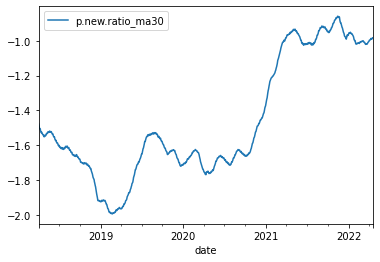

In [ ]:
d1.plot()

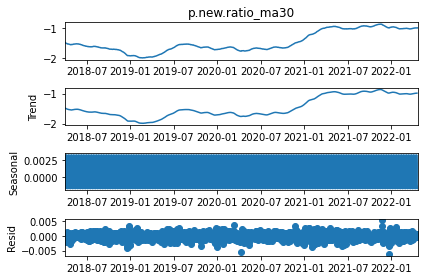

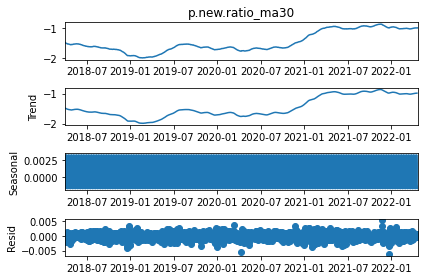

In [ ]:

results = seasonal_decompose(d1['p.new.ratio_ma30'])
results.plot()

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import datetime
# timestamp = datetime.datetime.strptime(d_BTC['date'][0], "%Y-%m-%d")
d_BTC['date'] = d_BTC['date'].map(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d") )
d1.index = d1.date
d1.drop('date', axis = 1,  inplace = True)
train = d1.iloc[:(len(d1)-30)]
test = d1.iloc[(len(d1)-30):]
train1 = np.array(d1.iloc[:(len(d1)-30)])
test1 = np.array(d1.iloc[(len(d1)-30):])
n_input = 30
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=1)
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(generator,epochs=10)
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
last_train_batch = train[-30:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)
test_predictions = []

first_eval_batch = train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
test.plot(figsize=(14,5))

In [ ]:
test_predictions = []

first_eval_batch = train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

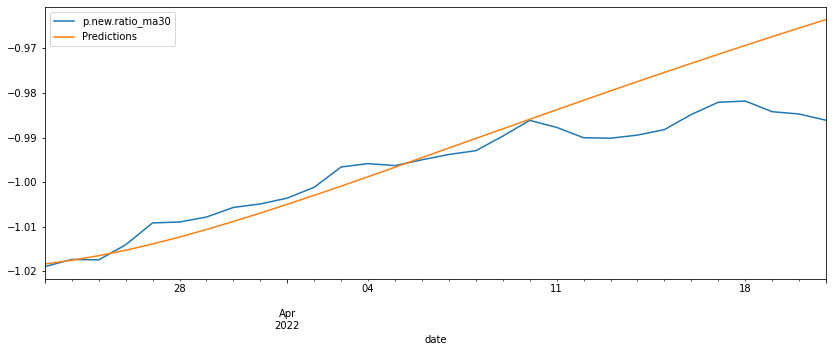

In [ ]:
def date_to_float(date):
    timestamp = (date - datetime.datetime(2018,4,1)).total_seconds()
    return timestamp / 86400
d1['date'] = d1['date'].map(lambda x: date_to_float(x) )

In [26]:
X = d1.drop("p.new.ratio_ma30", axis=1)
y = d1["p.new.ratio_ma30"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
X = d1.drop("p.new.ratio_ma30", axis=1)
y = d1["p.new.ratio_ma30"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regressor = LinearRegression()

# Fit the model to the data
regressor.fit(X_train, y_train)

# Predict the values of y
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)
r2 = regressor.score(X_train, y_train)
print(r2)

0.04378953912688914
0.6482161201119852


In [15]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = model.predict(X_test)
# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
r = r2_score(y_train, model.predict(X_train))
print("R2 score testing:", r2)
print("R2 score trainig:", r)

R2 score testing: 0.9999452771129133
R2 score trainig: 0.9999910077701075


In [18]:

model2 =GradientBoostingRegressor(loss = 'squared_error', learning_rate=0.01, n_estimators=100)
model2.fit(X_train, y_train)
train_score = model2.score(X_train, y_train)
test_score = model2.score(X_train, y_train)
print('train score for GBR ',train_score)
print('test score for GBR ',test_score)

train score for GBR  0.842916114644443
test score for GBR  0.842916114644443


In [30]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train, y_train)
y_pred = enet.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)
r2 = enet.score(X_train, y_train)
print(r2)

Mean Squared Error: 0.04378862380480968
0.6482160040493572


In [35]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression

model = PLSRegression(n_components=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)
score = enet.score(X_test, y_test)
print(score)


Mean Squared Error: 0.04378953912688915
0.622945685437128


/usr/local/lib/python3.8/dist-packages/sklearn/cross_decomposition/_pls.py:230: FutureWarning: As of version 0.24, n_components(2) should be in [1, n_features].n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(


In [33]:

# adding the constant term
x = sm.add_constant(X)

# performing the regression
# and fitting the model
result = sm.OLS(y, X).fit()

# printing the summary table
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:       p.new.ratio_ma30   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     2669.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:13:08   Log-Likelihood:                 249.79
No. Observations:                1482   AIC:                            -495.6
Df Residuals:                    1480   BIC:                            -485.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9400      0.011   -182.622      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       p.new.ratio_ma30   No. Observations:                 1482
Model:                            GLM   Df Residuals:                     1480
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Thu, 09 Feb 2023   Deviance:                   1.6315e+05
Time:                        09:41:18   Pearson chi2:                 1.51e+19
No. Iterations:                     2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.423e+16   3.48e+06  -4.08e+09      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
model = ARIMA(d1['p.new.ratio_ma30'].values, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())
# Predict the next 20 values of the time series
forecast, stderr, conf = model_fit.forecast(steps=3)

# Print the predictions
print("Predictions:", forecast)

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1482
Model:                 ARIMA(5, 1, 0)   Log Likelihood                6865.940
Date:                Mon, 06 Feb 2023   AIC                         -13719.880
Time:                        10:37:57   BIC                         -13688.077
Sample:                             0   HQIC                        -13708.025
                               - 1482                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7540      0.026     28.667      0.000       0.702       0.806
ar.L2         -0.3204      0.034     -9.483      0.000      -0.387      -0.254
ar.L3          0.3149      0.034      9.301      0.0

In [37]:
def resolve_prob(curency, target, model):
  d_f = df[df['symbol'] == curency  ]
  
  fig = px.scatter(d_f, x="date", y=target, title="values over time")
  fig.show()
  d1 = d_f[['date',target]]
  d2 = d1

  def date_to_float(date):
    timestamp = (date - datetime.datetime(2018,4,1)).total_seconds()
    return timestamp / 86400
  d1['date'] = d1['date'].map(lambda x: date_to_float(x) )
  X = d1.drop("p.new.ratio_ma30", axis=1)
  y = d1["p.new.ratio_ma30"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  if model == 'LinearRegression':
    
    regressor = LinearRegression()

    # Fit the model to the data
    regressor.fit(X_train, y_train)

    # Predict the values of y
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(mse)
    r2 = regressor.score(X_test, y_test)
    print(r2)
  if model == 'RandomForestRegressor':
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)

    # Evaluate the model on the test data
    y_pred = model.predict(X_test)
    # Calculate the R2 score
    r2 = r2_score(y_test, y_pred)
    r = r2_score(y_train, model.predict(X_train))
    print("R2 score testing:", r2)
    print("R2 score trainig:", r)
  
  if model == 'GradientBoostingRegressor':
    model2 =GradientBoostingRegressor(loss = 'squared_error', learning_rate=0.01, n_estimators=100)
    model2.fit(X_train, y_train)
    train_score = model2.score(X_train, y_train)
    test_score = model2.score(X_train, y_train)
    print('train score for GBR ',train_score)
    print('test score for GBR ',test_score)
  if model == 'ElasticNet':
    from sklearn.linear_model import ElasticNet
    enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
    enet.fit(X_train, y_train)
    y_pred = enet.predict(X_test)

    # Calculate the mean squared error of the predictions
    mse = mean_squared_error(y_test, y_pred)

    # Print the mean squared error
    print("Mean Squared Error:", mse)
    score = enet.score(X_test, y_test)
    print(score)
  if model == 'PLSRegression':
    
    from sklearn.cross_decomposition import PLSRegression

    model = PLSRegression(n_components=2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Print the mean squared error
    print("Mean Squared Error:", mse)
    score = enet.score(X_test, y_test)
    print(score)
  if model == 'OLS':
    # adding the constant term
    x = sm.add_constant(X)

    # performing the regression
    # and fitting the model
    result = sm.OLS(y, X).fit()

    # printing the summary table
    print(result.summary())
  
  if model == 'GLM':
    import statsmodels.api as sm
    X = sm.add_constant(X)
    model = sm.GLM(y, X, family=sm.families.Binomial())
    result = model.fit()
    print(result.summary())

  if model == '':
    from statsmodels.tsa.arima.model import ARIMA
    from sklearn.metrics import mean_squared_error
    model = ARIMA(d1[target].values, order=(5,1,0))
    model_fit = model.fit()
    print(model_fit.summary())
    # Predict the next 20 values of the time series
    forecast, stderr, conf = model_fit.forecast(steps=3)
  
  if model == 'LSTM': 
    from keras.preprocessing.sequence import TimeseriesGenerator
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import LSTM
    import datetime
    # timestamp = datetime.datetime.strptime(d_BTC['date'][0], "%Y-%m-%d")
    d2['date'] = d2['date'].map(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d") )
    d2.index = d2.date
    d2.drop('date', axis = 1,  inplace = True)
    train = d2.iloc[:(len(d2)-30)]
    test = d2.iloc[(len(d2)-30):]
    train1 = np.array(d2.iloc[:(len(d2)-30)])
    test1 = np.array(d2.iloc[(len(d2)-30):])
    n_input = 30
    n_features = 1
    generator = TimeseriesGenerator(train, train, length=n_input, batch_size=1)
    X,y = generator[0]
    print(f'Given the Array: \n{X.flatten()}')
    print(f'Predict this y: \n {y}')
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(generator,epochs=10)
    loss_per_epoch = model.history.history['loss']
    plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
    last_train_batch = train[-30:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    model.predict(last_train_batch)
    test_predictions = []

    first_eval_batch = train[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))

    for i in range(len(test)):
        
        # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
        
        # append the prediction into the array
        test_predictions.append(current_pred) 
        
        # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    test.plot(figsize=(14,5))

  return
    


  